In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [147]:
x = [[5.9,3.2],
     [4.6,2.9],
     [6.2,2.8],
     [4.7,3.2],
     [5.5,4.2],
     [5.0,3.0],
     [4.9,3.1],
     [6.7,3.1],
     [5.1,3.8],
     [6.0,3.0]
    ]

In [149]:
x = np.array(x)

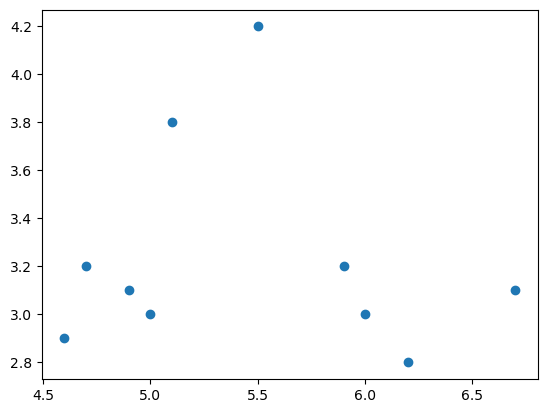

In [151]:
plt.scatter(x[:,0],x[:,1])

In [153]:
def dist(x,m):
    return (x[:,0]-m[0])**2 + (x[:,1]-m[1])**2

In [155]:
ms = [
    [6.2, 3.2],
    [6.6, 3.7],
    [6.5, 3.0]
]
ms = np.array(ms)
dists = np.array([dist(x,m) for m in ms])

In [157]:
dists

array([[0.09, 2.65, 0.16, 2.25, 1.49, 1.48, 1.7 , 0.26, 1.57, 0.08],
       [0.74, 4.64, 0.97, 3.86, 1.46, 3.05, 3.25, 0.37, 2.26, 0.85],
       [0.4 , 3.62, 0.13, 3.28, 2.44, 2.25, 2.57, 0.05, 2.6 , 0.25]])

In [159]:
dists = dists.T

In [161]:
dists

array([[0.09, 0.74, 0.4 ],
       [2.65, 4.64, 3.62],
       [0.16, 0.97, 0.13],
       [2.25, 3.86, 3.28],
       [1.49, 1.46, 2.44],
       [1.48, 3.05, 2.25],
       [1.7 , 3.25, 2.57],
       [0.26, 0.37, 0.05],
       [1.57, 2.26, 2.6 ],
       [0.08, 0.85, 0.25]])

In [163]:
cents = np.argmin(dists,axis = 1)
cents

array([0, 0, 2, 0, 1, 0, 0, 2, 0, 0])

In [165]:
def which(l,c):
    return [i for i,l in enumerate(l) if l == c]

In [167]:
idx0 = which(cents,0)
idx0

[0, 1, 3, 5, 6, 8, 9]

In [169]:
x[idx0]

array([[5.9, 3.2],
       [4.6, 2.9],
       [4.7, 3.2],
       [5. , 3. ],
       [4.9, 3.1],
       [5.1, 3.8],
       [6. , 3. ]])

In [171]:
np.mean(x[idx0],axis = 0)

array([5.17142857, 3.17142857])

In [223]:
def dist(x, m):
    return (x[:, 0] - m[0])**2 + (x[:, 1] - m[1])**2

def which(arr, val):
    return np.where(arr == val)[0]

def kmeans(x, k=3, itr=10, tol = 1e-10):
    # Initial centroids
    ms = np.array([
        [6.2, 3.2],
        [6.6, 3.7],
        [6.5, 3.0]
    ])

    for it in range(itr):
        print(f"Iteration {it}")
        pre = ms
        # Compute distances from points to each centroid
        dists = np.array([dist(x, m) for m in ms]).T
        print("-----------distance-----------")
        print(dists)
        print("-----------------------------")
        # Assign each point to the nearest centroid
        cents = np.argmin(dists, axis=1)

        # Group point indices by their assigned centroid
        idxs = [[] for _ in range(k)]
        for i in range(k):
            idxs[i] = which(cents, i)
            print(f"the cluster {i} has {len(idxs[i])} points")
            print(f"indexs are {idxs[i]}")
            if len(idxs[i]) > 0:
                ms[i] = np.mean(x[idxs[i]], axis=0)

            print(f"Centroid {i}: {ms[i]}")
        """
        if np.all(np.linalg.norm(ms - pre, axis=1) < tol):
            print(f"Converged at iteration {it}")
            break
        """
    return ms, cents


In [225]:
kmeans(x,3)

Iteration 0
-----------distance-----------
[[0.09 0.74 0.4 ]
 [2.65 4.64 3.62]
 [0.16 0.97 0.13]
 [2.25 3.86 3.28]
 [1.49 1.46 2.44]
 [1.48 3.05 2.25]
 [1.7  3.25 2.57]
 [0.26 0.37 0.05]
 [1.57 2.26 2.6 ]
 [0.08 0.85 0.25]]
-----------------------------
the cluster 0 has 7 points
indexs are [0 1 3 5 6 8 9]
Centroid 0: [5.17142857 3.17142857]
the cluster 1 has 1 points
indexs are [4]
Centroid 1: [5.5 4.2]
the cluster 2 has 2 points
indexs are [2 7]
Centroid 2: [6.45 2.95]
Iteration 1
-----------distance-----------
[[0.53163265 1.16       0.365     ]
 [0.40020408 2.5        3.425     ]
 [1.19591837 2.45       0.085     ]
 [0.22306122 1.64       3.125     ]
 [1.16591837 0.         2.465     ]
 [0.05877551 1.69       2.105     ]
 [0.07877551 1.57       2.425     ]
 [2.34163265 2.65       0.085     ]
 [0.40020408 0.32       2.545     ]
 [0.71591837 1.69       0.205     ]]
-----------------------------
the cluster 0 has 4 points
indexs are [1 3 5 6]
Centroid 0: [4.8  3.05]
the cluster 1 has 

(array([[4.8  , 3.05 ],
        [5.3  , 4.   ],
        [6.2  , 3.025]]),
 array([2, 0, 2, 0, 1, 0, 0, 2, 1, 2]))